In [1]:
pip install tensorflow scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
train_dir = 'training'
validation_dir = 'validation'

img_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical' 
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {validation_accuracy*100:.2f}%')


Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,579,978 (13.66 MB)

 Trainable params: 1,321,994 (5.04 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6159 - loss: 1.1784 - val_accuracy: 0.9570 - val_loss: 0.1537
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.9062 - loss: 0.1857 - val_accuracy: 0.9688 - val_loss: 0.1495
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9390 - loss: 0.1619 - val_accuracy: 0.9648 - val_loss: 0.1296
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.9062 - loss: 0.2536 - val_accuracy: 0.9609 - val_loss: 0.1225
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9767 - loss: 0.1065 - val_accuracy: 0.9531 - val_loss: 0.1503
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 0.9688 - loss: 0.0815 - val_accuracy: 0.9531 - val_loss: 0.1389
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9743 - loss: 0.0955 - val_accuracy: 0.9727 - val_loss: 0.1018
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 1.0000 - loss: 0.0191 - val_accuracy: 0.9727 - v

In [14]:
# Save the trained model
model.save('monkey_classifier_model.h5')

In [15]:
# Load the trained model
loaded_model = tf.keras.models.load_model('monkey_classifier_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step
Predicted Class: n3


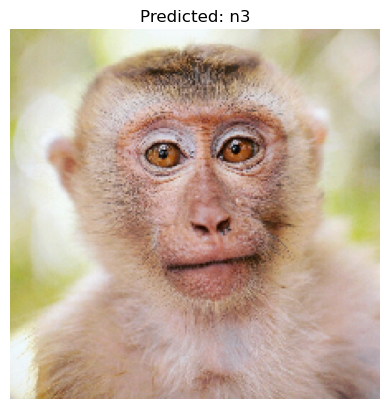

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('monkey_classifier_model.h5')
img_size = (224, 224)
def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    class_labels = list(train_generator.class_indices.keys()) 
    print(f"Predicted Class: {class_labels[predicted_class]}")
    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[predicted_class]}")
    plt.axis('off') 
    plt.show()
img_path = 'monkey.jpg'  
predict_image(img_path)

In [ ]:
"""
for overfitting 
1)LASSO `
2) RIDGE 

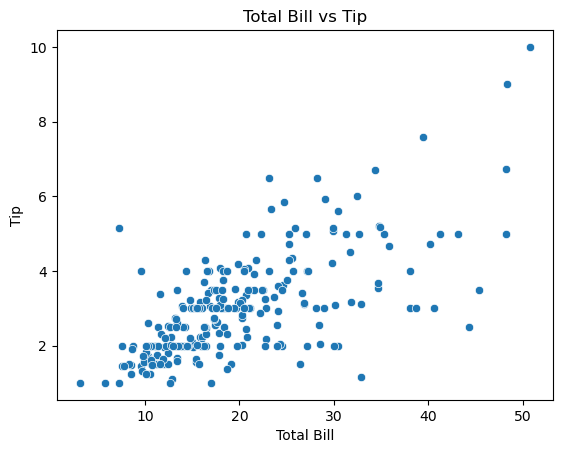

Mean Squared Error (Linear Regression): 0.5688142529229538
Mean Squared Error (Lasso Regression): 0.5672185472600115


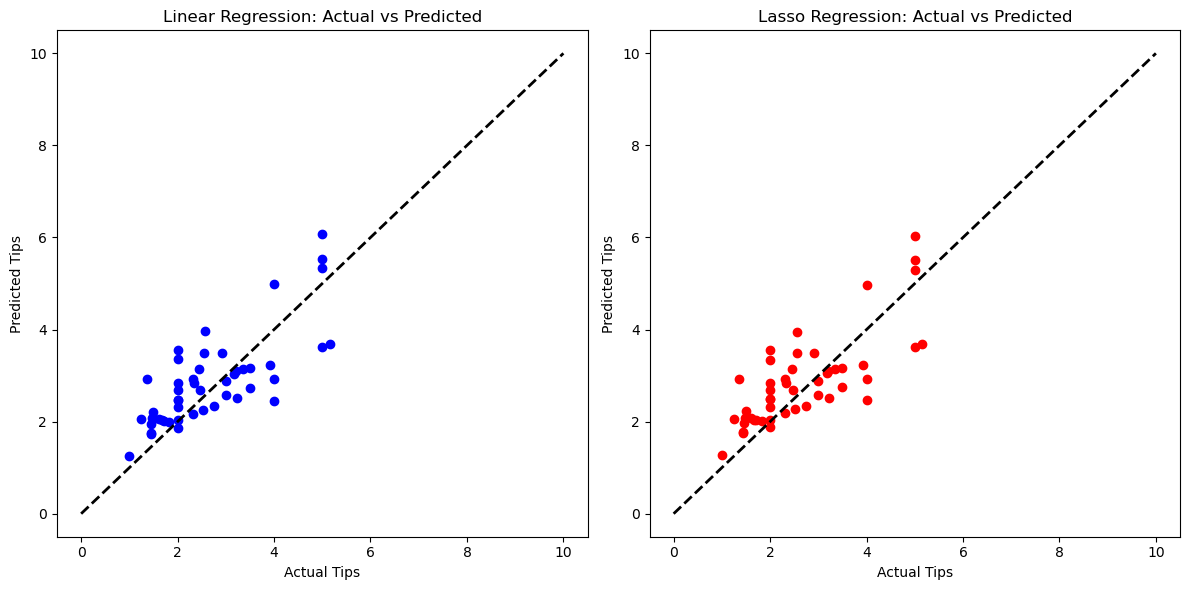

<function matplotlib.pyplot.show(close=None, block=None)>

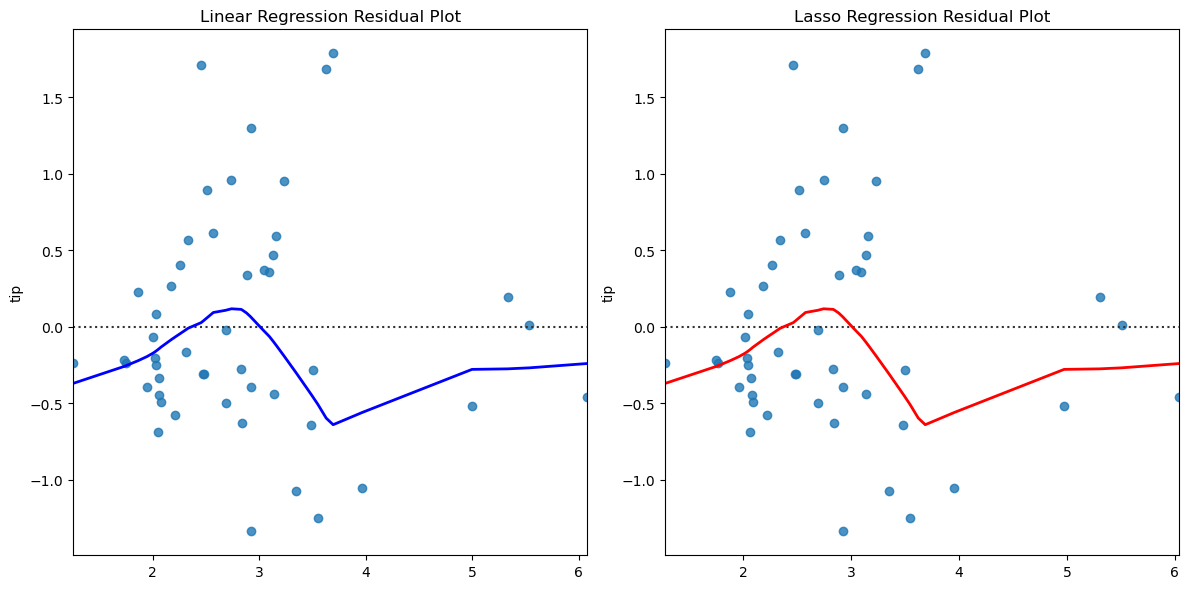

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

tips = sns.load_dataset("tips")

sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

X = tips[['total_bill']]  
y = tips['tip']   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred_linear = linear_reg.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error (Linear Regression): {mse_linear}')

lasso_reg = Lasso(alpha=0.1)

# Train the Lasso model
lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error (Lasso Regression): {mse_lasso}')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.plot([0, 10], [0, 10], 'k--', lw=2)  
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Linear Regression: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, color='red', label='Lasso Regression')
plt.plot([0, 10], [0, 10], 'k--', lw=2)  
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Lasso Regression: Actual vs Predicted')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.residplot(x=y_pred_linear, y=y_test - y_pred_linear, lowess=True, line_kws={'color': 'blue', 'lw': 2})
plt.title('Linear Regression Residual Plot')


plt.subplot(1, 2, 2)
sns.residplot(x=y_pred_lasso, y=y_test - y_pred_lasso, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Lasso Regression Residual Plot')

plt.tight_layout()
plt.show


Top 3 Features (Linear Regression):
         Feature   Coefficient
2      cut_Ideal  1.774063e+14
3    cut_Premium  1.774063e+14
4  cut_Very Good  1.774063e+14


C:\Users\student\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.384e+07, tolerance: 6.870e+07
  model = cd_fast.enet_coordinate_descent(



Top 3 Features (Lasso Regression):
        Feature  Coefficient
20        carat  5334.813071
12   clarity_I1 -4354.708420
15  clarity_SI2 -1659.958593

Top 3 Features (Ridge Regression):
       Feature  Coefficient
20       carat  5336.105515
12  clarity_I1 -3813.509183
13  clarity_IF  1544.206928


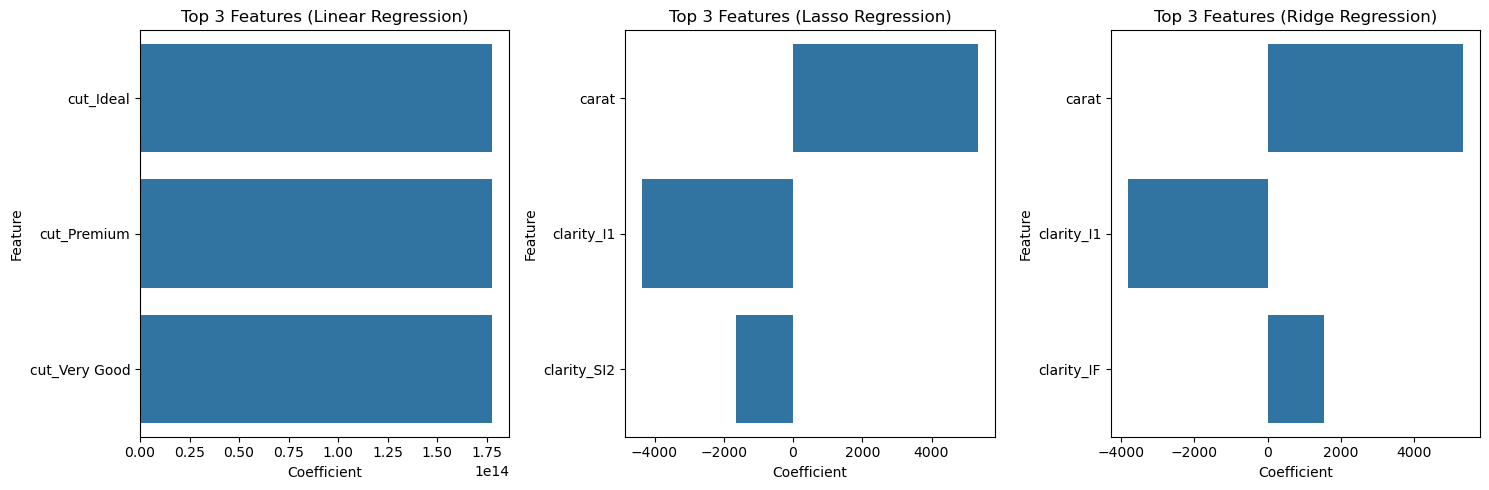

In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

# Load the diamonds dataset from Seaborn
diamonds = sns.load_dataset('diamonds')

# Define features and target variable
X = diamonds.drop('price', axis=1)  # All features except 'price'
y = diamonds['price']  # Target variable

# Preprocessing: OneHotEncoding categorical variables and scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['cut', 'color', 'clarity']),
        ('num', StandardScaler(), ['carat', 'depth', 'table', 'x', 'y', 'z'])  # Normalize numerical features
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = make_pipeline(preprocessor, LinearRegression())
linear_model.fit(X_train, y_train)

# Get the coefficients of the Linear Regression model
linear_coefficients = linear_model.named_steps['linearregression'].coef_

# Combine the coefficients with the feature names
linear_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(['cut', 'color', 'clarity'])
linear_feature_names = np.concatenate([linear_feature_names, ['carat', 'depth', 'table', 'x', 'y', 'z']])
linear_coef_df = pd.DataFrame({
    'Feature': linear_feature_names,
    'Coefficient': linear_coefficients
})

# Sort by absolute coefficient values (importance)
linear_coef_df['Abs_Coefficient'] = linear_coef_df['Coefficient'].abs()
top_3_linear_features = linear_coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(3)
print("Top 3 Features (Linear Regression):")
print(top_3_linear_features[['Feature', 'Coefficient']])


# Lasso Regression Model (with alpha = 0.1)
lasso_model = make_pipeline(preprocessor, Lasso(alpha=0.1))
lasso_model.fit(X_train, y_train)

# Get the coefficients of the Lasso Regression model
lasso_coefficients = lasso_model.named_steps['lasso'].coef_

# Combine the coefficients with the feature names
lasso_coef_df = pd.DataFrame({
    'Feature': linear_feature_names,
    'Coefficient': lasso_coefficients
})

# Sort by absolute coefficient values (importance)
lasso_coef_df['Abs_Coefficient'] = lasso_coef_df['Coefficient'].abs()
top_3_lasso_features = lasso_coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(3)
print("\nTop 3 Features (Lasso Regression):")
print(top_3_lasso_features[['Feature', 'Coefficient']])


# Ridge Regression Model (with alpha = 1)
ridge_model = make_pipeline(preprocessor, Ridge(alpha=1))
ridge_model.fit(X_train, y_train)

# Get the coefficients of the Ridge Regression model
ridge_coefficients = ridge_model.named_steps['ridge'].coef_

# Combine the coefficients with the feature names
ridge_coef_df = pd.DataFrame({
    'Feature': linear_feature_names,
    'Coefficient': ridge_coefficients
})

# Sort by absolute coefficient values (importance)
ridge_coef_df['Abs_Coefficient'] = ridge_coef_df['Coefficient'].abs()
top_3_ridge_features = ridge_coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(3)
print("\nTop 3 Features (Ridge Regression):")
print(top_3_ridge_features[['Feature', 'Coefficient']])


# Visualizing the Top Features
plt.figure(figsize=(15, 5))

# Linear Regression Top Features
plt.subplot(1, 3, 1)
sns.barplot(x='Coefficient', y='Feature', data=top_3_linear_features)
plt.title('Top 3 Features (Linear Regression)')

# Lasso Regression Top Features
plt.subplot(1, 3, 2)
sns.barplot(x='Coefficient', y='Feature', data=top_3_lasso_features)
plt.title('Top 3 Features (Lasso Regression)')

# Ridge Regression Top Features
plt.subplot(1, 3, 3)
sns.barplot(x='Coefficient', y='Feature', data=top_3_ridge_features)
plt.title('Top 3 Features (Ridge Regression)')

plt.tight_layout()
plt.show()


C:\Users\student\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.384e+07, tolerance: 6.870e+07
  model = cd_fast.enet_coordinate_descent(


Linear Regression Evaluation:
Mean Squared Error (MSE): 1288717.17
R² Score: 0.92

Lasso Regression Evaluation:
Mean Squared Error (MSE): 1288611.81
R² Score: 0.92

Ridge Regression Evaluation:
Mean Squared Error (MSE): 1288677.68
R² Score: 0.92



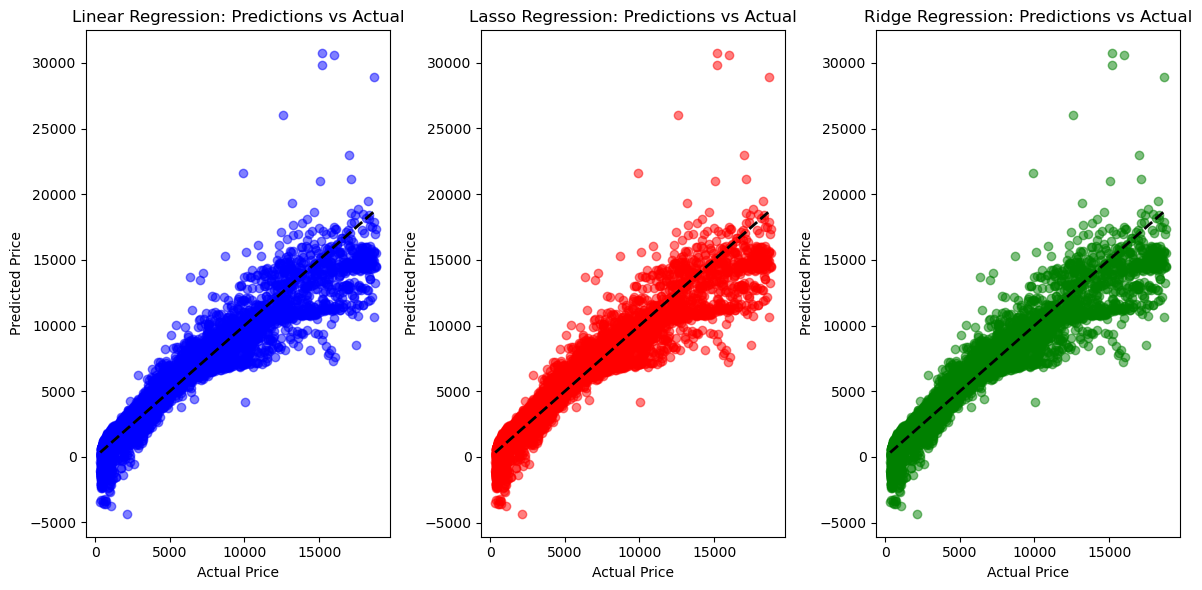

In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Load the diamonds dataset from Seaborn
diamonds = sns.load_dataset('diamonds')

# Define features and target variable
X = diamonds.drop('price', axis=1)  # All features except 'price'
y = diamonds['price']  # Target variable

# Preprocessing: OneHotEncoding categorical variables and scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['cut', 'color', 'clarity']),
        ('num', StandardScaler(), ['carat', 'depth', 'table', 'x', 'y', 'z'])  # Normalize numerical features
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = make_pipeline(preprocessor, LinearRegression())
linear_model.fit(X_train, y_train)

# Lasso Regression Model (with alpha = 0.1)
lasso_model = make_pipeline(preprocessor, Lasso(alpha=0.1))
lasso_model.fit(X_train, y_train)

# Ridge Regression Model (with alpha = 1)
ridge_model = make_pipeline(preprocessor, Ridge(alpha=1))
ridge_model.fit(X_train, y_train)

# Make predictions on the test set for each model
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the models using Mean Squared Error (MSE) and R² Score
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display the evaluation results
print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R² Score: {r2_linear:.2f}\n")

print("Lasso Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"R² Score: {r2_lasso:.2f}\n")

print("Ridge Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.2f}\n")

# Visualizing the predictions vs actual prices
plt.figure(figsize=(12, 6))

# Linear Regression predictions vs actual
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression: Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Lasso Regression predictions vs actual
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Lasso Regression: Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Ridge Regression predictions vs actual
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Ridge Regression: Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()


C:\Users\student\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.384e+07, tolerance: 6.870e+07
  model = cd_fast.enet_coordinate_descent(


Linear Regression Evaluation:
Mean Squared Error (MSE): 1288717.17
R² Score: 0.92

Lasso Regression Evaluation:
Mean Squared Error (MSE): 1288611.81
R² Score: 0.92

Ridge Regression Evaluation:
Mean Squared Error (MSE): 1288677.68
R² Score: 0.92



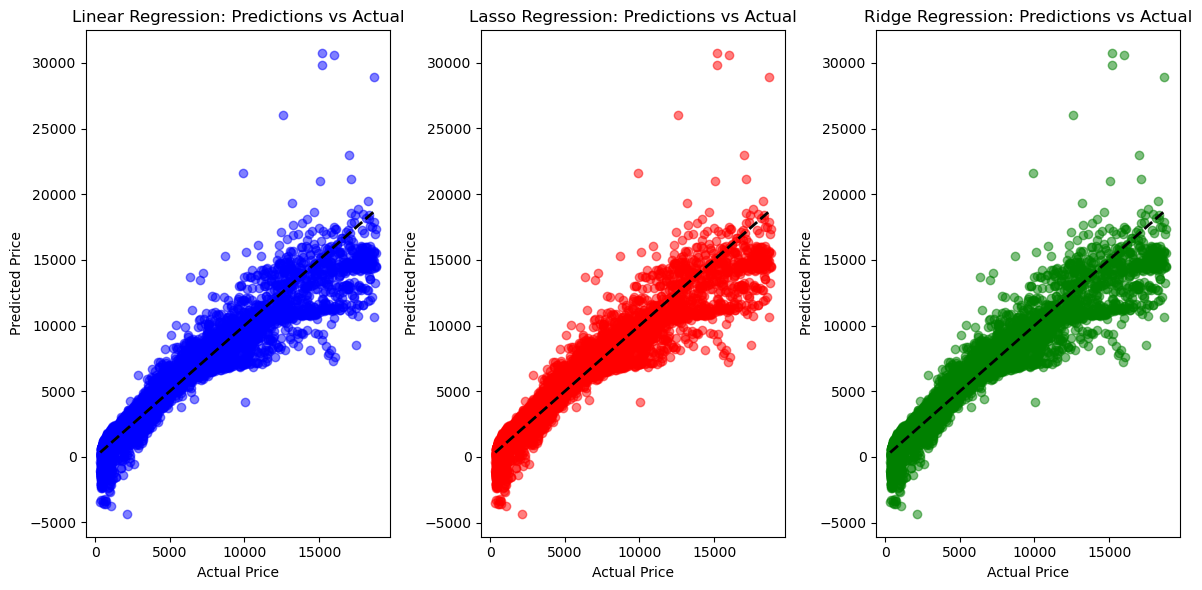

In [26]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Load the diamonds dataset from Seaborn
diamonds = sns.load_dataset('diamonds')

# Define features and target variable
X = diamonds.drop('price', axis=1)  # All features except 'price'
y = diamonds['price']  # Target variable

# Preprocessing: OneHotEncoding categorical variables and scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['cut', 'color', 'clarity']),
        ('num', StandardScaler(), ['carat', 'depth', 'table', 'x', 'y', 'z'])  # Normalize numerical features
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = make_pipeline(preprocessor, LinearRegression())
linear_model.fit(X_train, y_train)

# Lasso Regression Model (with alpha = 0.1)
lasso_model = make_pipeline(preprocessor, Lasso(alpha=0.1))
lasso_model.fit(X_train, y_train)

# Ridge Regression Model (with alpha = 1)
ridge_model = make_pipeline(preprocessor, Ridge(alpha=1))
ridge_model.fit(X_train, y_train)

# Make predictions on the test set for each model
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the models using Mean Squared Error (MSE) and R² Score
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display the evaluation results
print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R² Score: {r2_linear:.2f}\n")

print("Lasso Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"R² Score: {r2_lasso:.2f}\n")

print("Ridge Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.2f}\n")

# Visualizing the predictions vs actual prices
plt.figure(figsize=(12, 6))

# Linear Regression predictions vs actual
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression: Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Lasso Regression predictions vs actual
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Lasso Regression: Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Ridge Regression predictions vs actual
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Ridge Regression: Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()


Linear Regression Evaluation:
Mean Squared Error (MSE): 1288705.48
R² Score: 0.92

Lasso Regression Evaluation:
Mean Squared Error (MSE): 1288614.89
R² Score: 0.92

Ridge Regression Evaluation:
Mean Squared Error (MSE): 1288685.22
R² Score: 0.92



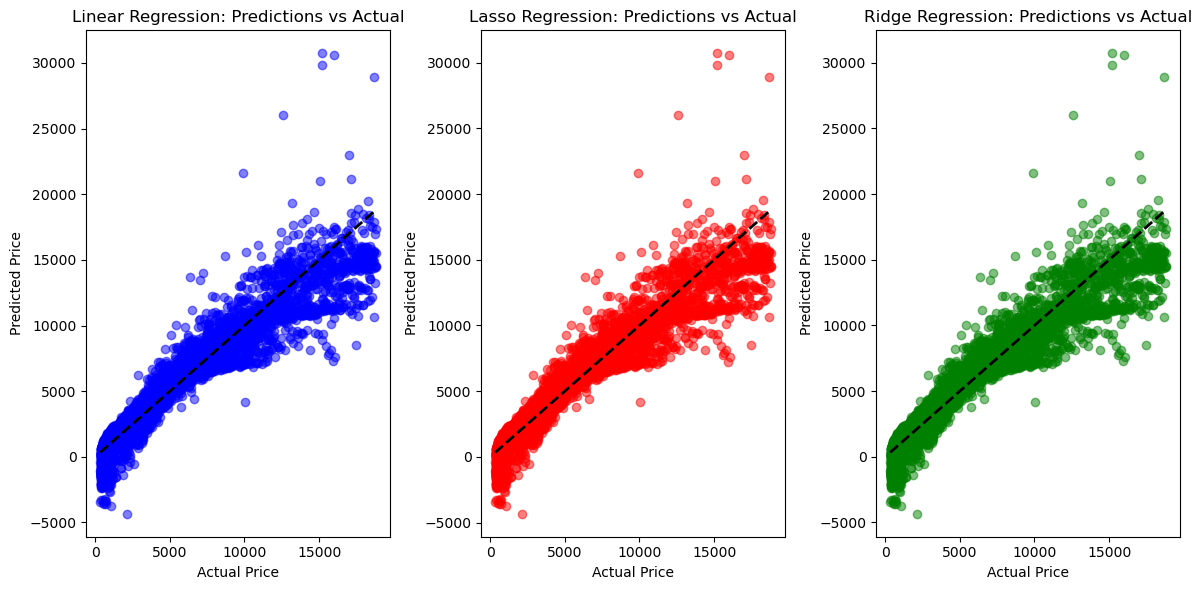

In [27]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the diamonds dataset from Seaborn
diamonds = sns.load_dataset('diamonds')

# Apply One-Hot Encoding to the categorical features ('cut', 'color', 'clarity')
diamonds_encoded = pd.get_dummies(diamonds, columns=['cut', 'color', 'clarity'], drop_first=True)

# Define features (X) and target variable (y)
X = diamonds_encoded.drop('price', axis=1)  # All features except 'price'
y = diamonds_encoded['price']  # Target variable (price)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Lasso Regression Model (with alpha = 0.1)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Ridge Regression Model (with alpha = 1)
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set for each model
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the models using Mean Squared Error (MSE) and R² Score
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display the evaluation results
print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R² Score: {r2_linear:.2f}\n")

print("Lasso Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"R² Score: {r2_lasso:.2f}\n")

print("Ridge Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.2f}\n")

# Visualizing the predictions vs actual prices
plt.figure(figsize=(12, 6))

# Linear Regression predictions vs actual
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression: Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Lasso Regression predictions vs actual
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Lasso Regression: Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Ridge Regression predictions vs actual
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Ridge Regression: Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()


Linear Regression Evaluation:
Mean Squared Error (MSE): 1371937.88
R² Score: 0.91

Lasso Regression Evaluation:
Mean Squared Error (MSE): 1371872.21
R² Score: 0.91

Ridge Regression Evaluation:
Mean Squared Error (MSE): 1371926.56
R² Score: 0.91



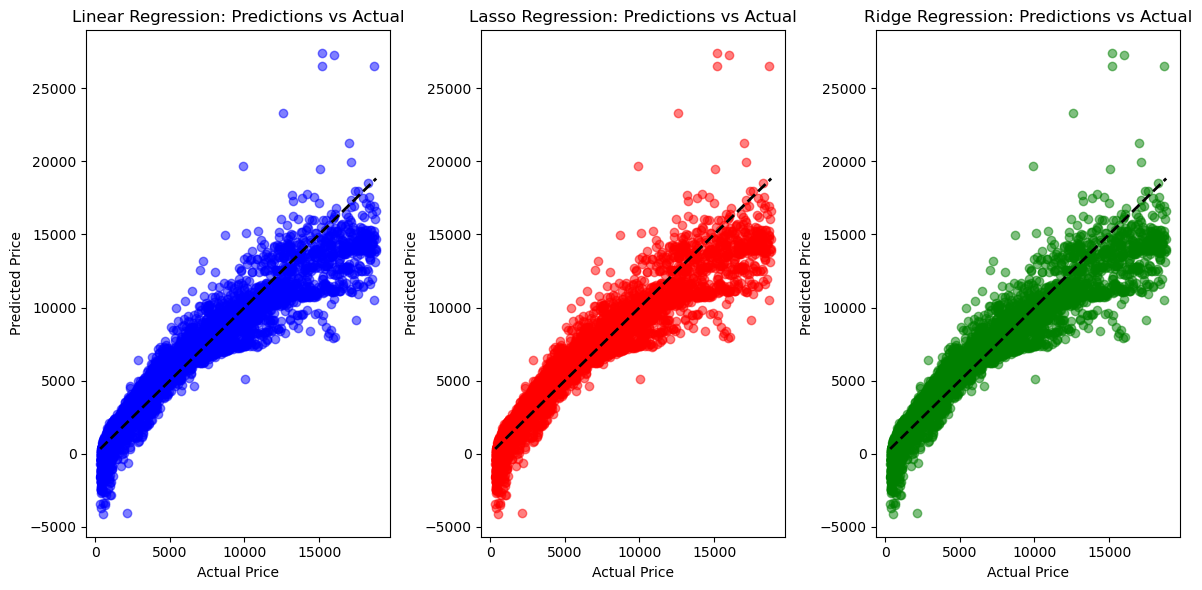

In [28]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the diamonds dataset from Seaborn
diamonds = sns.load_dataset('diamonds')

# Select only the relevant features: carat, color, and clarity
diamonds_filtered = diamonds[['carat', 'color', 'clarity', 'price']]

# Apply One-Hot Encoding to the categorical features ('color', 'clarity') using pd.get_dummies
diamonds_encoded = pd.get_dummies(diamonds_filtered, columns=['color', 'clarity'], drop_first=True)

# Define features (X) and target variable (y)
X = diamonds_encoded.drop('price', axis=1)  # All features except 'price'
y = diamonds_encoded['price']  # Target variable (price)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Lasso Regression Model (with alpha = 0.1)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Ridge Regression Model (with alpha = 1)
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set for each model
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the models using Mean Squared Error (MSE) and R² Score
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display the evaluation results
print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"R² Score: {r2_linear:.2f}\n")

print("Lasso Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"R² Score: {r2_lasso:.2f}\n")

print("Ridge Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.2f}\n")

# Visualizing the predictions vs actual prices
plt.figure(figsize=(12, 6))

# Linear Regression predictions vs actual
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression: Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Lasso Regression predictions vs actual
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Lasso Regression: Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Ridge Regression predictions vs actual
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Ridge Regression: Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()


SVM Regression Evaluation:
Mean Squared Error (MSE): 12768652.17
R² Score: 0.20

Decision Tree Regression Evaluation:
Mean Squared Error (MSE): 387038.87
R² Score: 0.98

Random Forest Regression Evaluation:
Mean Squared Error (MSE): 357704.27
R² Score: 0.98



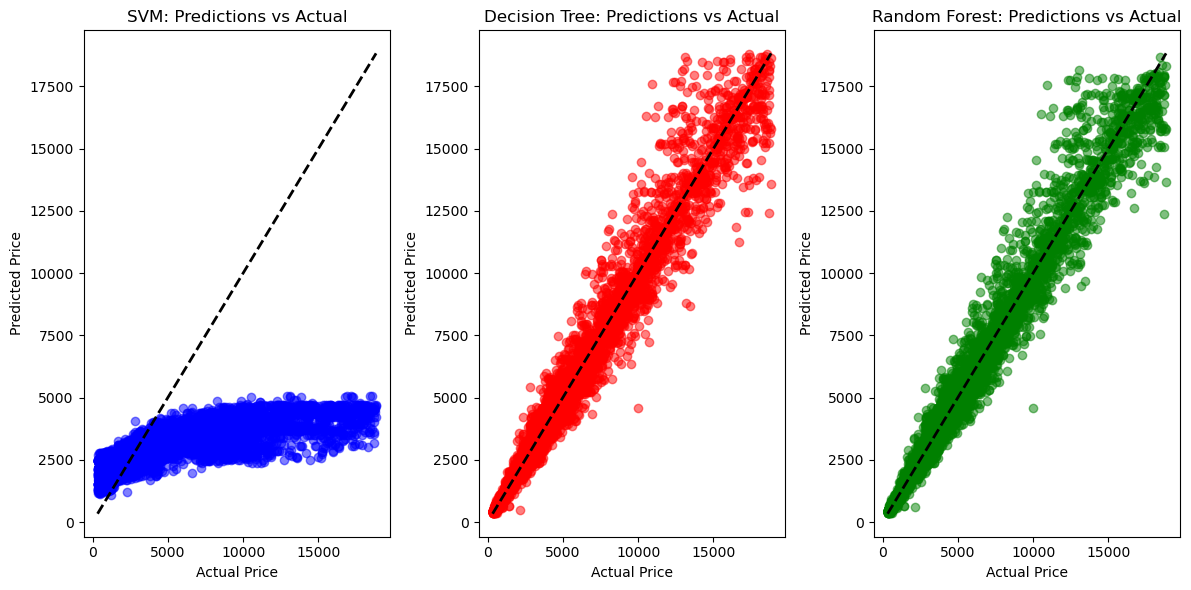

In [29]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
diamonds = sns.load_dataset('diamonds')
diamonds_filtered = diamonds[['carat', 'color', 'clarity', 'price']]
diamonds_encoded = pd.get_dummies(diamonds_filtered, columns=['color', 'clarity'], drop_first=True)
X = diamonds_encoded.drop('price', axis=1)  
y = diamonds_encoded['price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)


decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train) 
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)  
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("SVM Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_svm:.2f}")
print(f"R² Score: {r2_svm:.2f}\n")

print("Decision Tree Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_decision_tree:.2f}")
print(f"R² Score: {r2_decision_tree:.2f}\n")

print("Random Forest Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_random_forest:.2f}")
print(f"R² Score: {r2_random_forest:.2f}\n")
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_svm, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('SVM: Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_decision_tree, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Decision Tree: Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_random_forest, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest: Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.tight_layout()
plt.show()

SVM with RBF Kernel Evaluation:
Mean Squared Error (MSE): 12768652.17
R² Score: 0.20

SVM with Polynomial Kernel Evaluation:
Mean Squared Error (MSE): 12646726.96
R² Score: 0.20



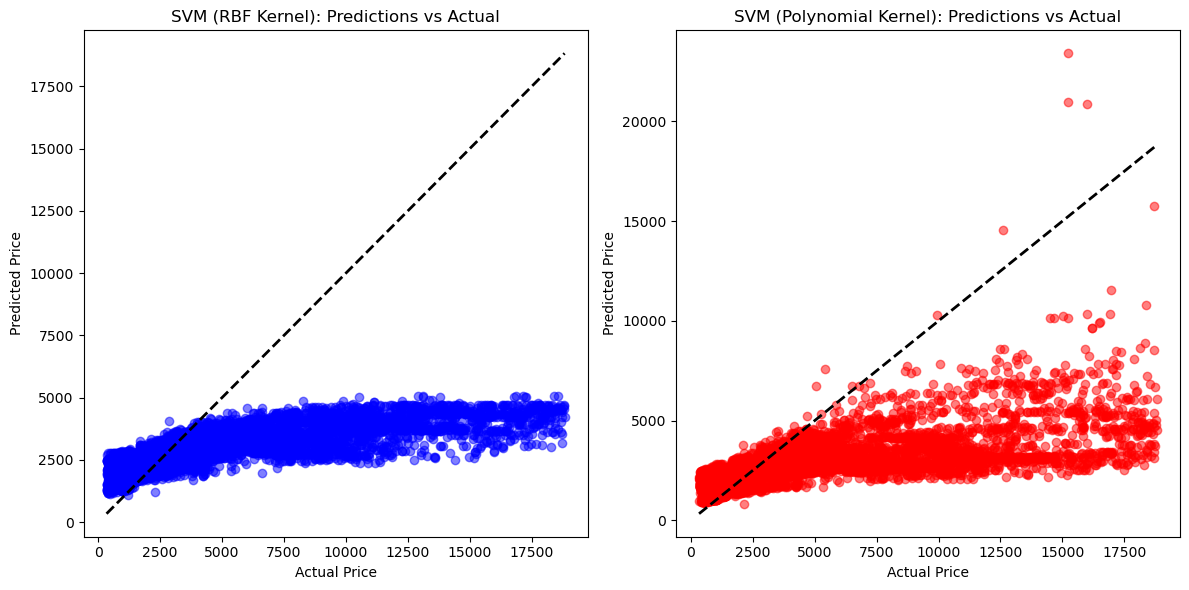

In [30]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
diamonds = sns.load_dataset('diamonds')
diamonds_filtered = diamonds[['carat', 'color', 'clarity', 'price']]
diamonds_encoded = pd.get_dummies(diamonds_filtered, columns=['color', 'clarity'], drop_first=True)
X = diamonds_encoded.drop('price', axis=1)  
y = diamonds_encoded['price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_rbf_model = SVR(kernel='rbf')
svm_rbf_model.fit(X_train_scaled, y_train)
svm_poly_model = SVR(kernel='poly', degree=3)  
svm_poly_model.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf_model.predict(X_test_scaled)
y_pred_poly = svm_poly_model.predict(X_test_scaled)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
r2_rbf = r2_score(y_test, y_pred_rbf)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("SVM with RBF Kernel Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rbf:.2f}")
print(f"R² Score: {r2_rbf:.2f}\n")

print("SVM with Polynomial Kernel Evaluation:")
print(f"Mean Squared Error (MSE): {mse_poly:.2f}")
print(f"R² Score: {r2_poly:.2f}\n")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rbf, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('SVM (RBF Kernel): Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('SVM (Polynomial Kernel): Predictions vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.tight_layout()
plt.show()

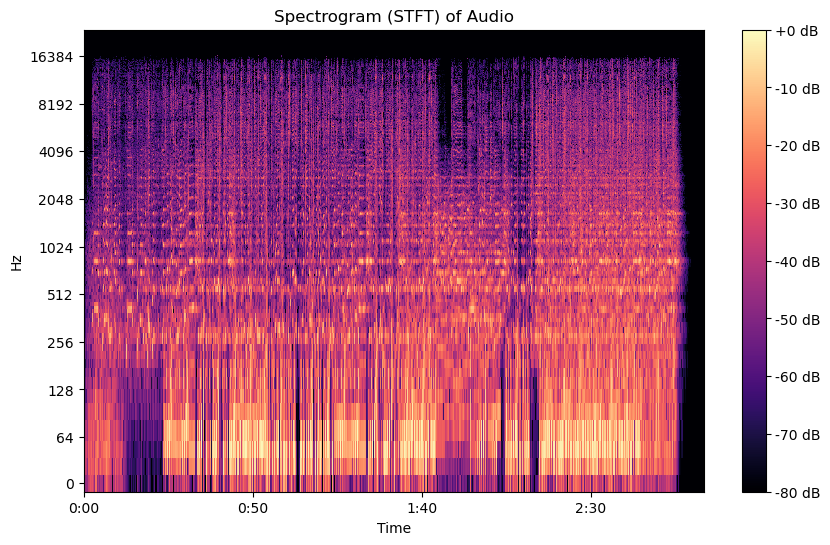

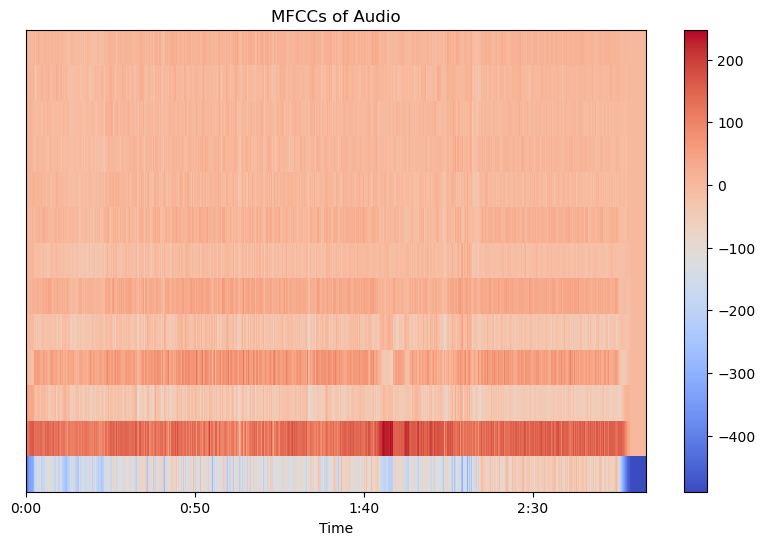

MFCC Matrix Shape: (13, 17186)


In [35]:
#!pip install librosa  # Install librosa if not already installed

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
audio_file = 'audio.mp3'
y, sr = librosa.load(audio_file, sr=None)  


D = librosa.stft(y)  
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) 

plt.figure(figsize=(10, 6))
librosa.display.specshow(S_db, x_axis='time', y_axis='log', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (STFT) of Audio')
plt.show()

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  

plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCCs of Audio')
plt.show()
print(f"MFCC Matrix Shape: {mfccs.shape}")


In [ ]:
#build a webapp that takes city as an input and show map (50km x50km )

In [37]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mmoreaux/audio-cats-and-dogs")
print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 97.0M/97.0M [00:08<00:00, 12.0MB/s]

Extracting files...


Path to dataset files: C:\Users\student\.cache\kagglehub\datasets\mmoreaux\audio-cats-and-dogs\versions\5


In [42]:
# Install necessary libraries
#!pip install kagglehub librosa tensorflow matplotlib

import kagglehub
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Function to load and extract MFCC features from an audio file
def preprocess_audio(file_path, sr=22050, n_mfcc=13):
    y, _ = librosa.load(file_path, sr=sr)
    # Extract MFCC features from audio
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    # Mean of MFCC over time
    mfcc = np.mean(mfcc.T, axis=0)
    return mfcc
path=r"C:\Users\student\Downloads\archive (1)"
# Assuming the dataset has two directories: 'cat' and 'dog'
dataset_path = path  # Path to the downloaded dataset
audio_files = []
labels = []

for label in ["cat", "dog"]:
    folder = os.path.join(dataset_path, label)
    for audio_file in os.listdir(folder):
        if audio_file.endswith(".wav") or audio_file.endswith(".mp3"):
            audio_path = os.path.join(folder, audio_file)
            mfcc_features = preprocess_audio(audio_path)
            audio_files.append(mfcc_features)
            labels.append(0 if label == "cat" else 1)  # 0 for cat, 1 for dog

# Convert to numpy arrays
X = np.array(audio_files)
y = np.array(labels)

# Normalize features (mean normalization)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network model
model = models.Sequential([
    layers.Input(shape=(13,)),  # 13 MFCC coefficients
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary output (cat or dog)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Test prediction on a new audio file
def predict_class(audio_path):
    mfcc_features = preprocess_audio(audio_path)
    mfcc_features = np.array([mfcc_features])  # Add batch dimension
    prediction = model.predict(mfcc_features)
    return "Dog" if prediction >= 0.5 else "Cat"

# Test prediction on a new audio file
test_audio_path = 'path_to_test_audio.wav'  # Replace with an actual file path
predicted_class = predict_class(test_audio_path)
print(f"Predicted class for the test audio: {predicted_class}")

# Visualize training and validation accuracy/loss
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\student\\Downloads\\archive (1)\\cat'

In [43]:
import os

dataset_path = r"C:\Users\student\Downloads\archive (1)"

# Check if the directory exists and list its contents
if os.path.exists(dataset_path):
    print("Dataset directory exists!")
    print("Contents of the directory:", os.listdir(dataset_path))
else:
    print("Dataset directory not found!")

# Check for 'cat' and 'dog' folders inside the dataset path
cat_folder = os.path.join(dataset_path, "cat")
dog_folder = os.path.join(dataset_path, "dog")

if os.path.exists(cat_folder):
    print(f"Found 'cat' folder: {cat_folder}")
else:
    print("No 'cat' folder found!")

if os.path.exists(dog_folder):
    print(f"Found 'dog' folder: {dog_folder}")
else:
    print("No 'dog' folder found!")


Dataset directory exists!
Contents of the directory: ['cats_dogs', 'train_test_split.csv', 'utils.py']
No 'cat' folder found!
No 'dog' folder found!
